## Contour plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Define the parameters needed

In [2]:
""" Model Parameters """

N = 1

gamma = 1/7  # recovery rate

beta = 0.9*gamma # transmission rate wild type

phi = 1.6 # change of infectivity Aw versus the infectivity of Hw

eta =0.45 # fraction that develops severe disease after wild-type infection 

alpha = 1/30 # 1/alpha = mean duration of natural immunity

rho = 1e-5 # import rate 

### Contour plot for R0 as function of $\eta$ and $\phi$

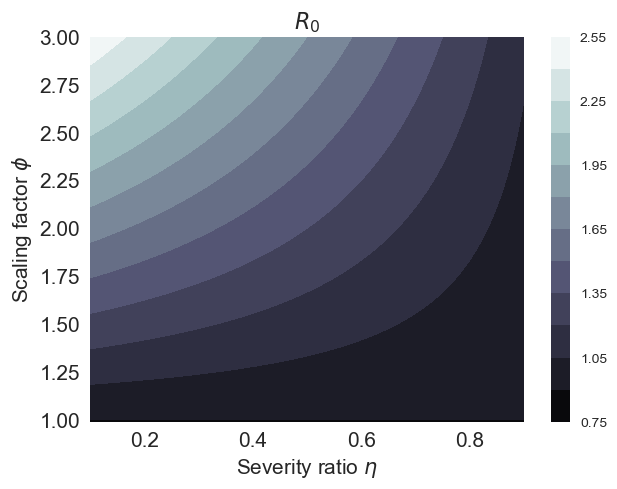

In [6]:
plt.style.use('seaborn')

# ranges of interest
eta_range = np.linspace(0.1, 0.9, 100)
phi_range = np.linspace(0.99, 3.0, 100)

# Creating 2-D grid of ranges 
[ETA, PHI] = np.meshgrid(eta_range, phi_range) 

fig1, ax = plt.subplots(figsize=(7,5), ncols=1, nrows=1) 
  
R0 = (ETA + (1-ETA)*PHI)*beta/gamma
  
# plots filled contour plot 
CS = ax.contourf(ETA, PHI, R0, 15, cmap=plt.cm.bone) 
#ax.clabel(CS, inline=True, fontsize=15)
ax.set_title(r'$R_0$', fontsize=16)
ax.set_xlabel(r'Severity ratio $\eta$', fontsize=15)
ax.set_ylabel(r'Scaling factor $\phi$', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
#cbar.ax.set_ylabel(r'$R_0$', fontsize=25)

#plt.savefig("R0_contour.pdf", bbox_inches = 'tight')
plt.show()


Contour plot for the equilibria 

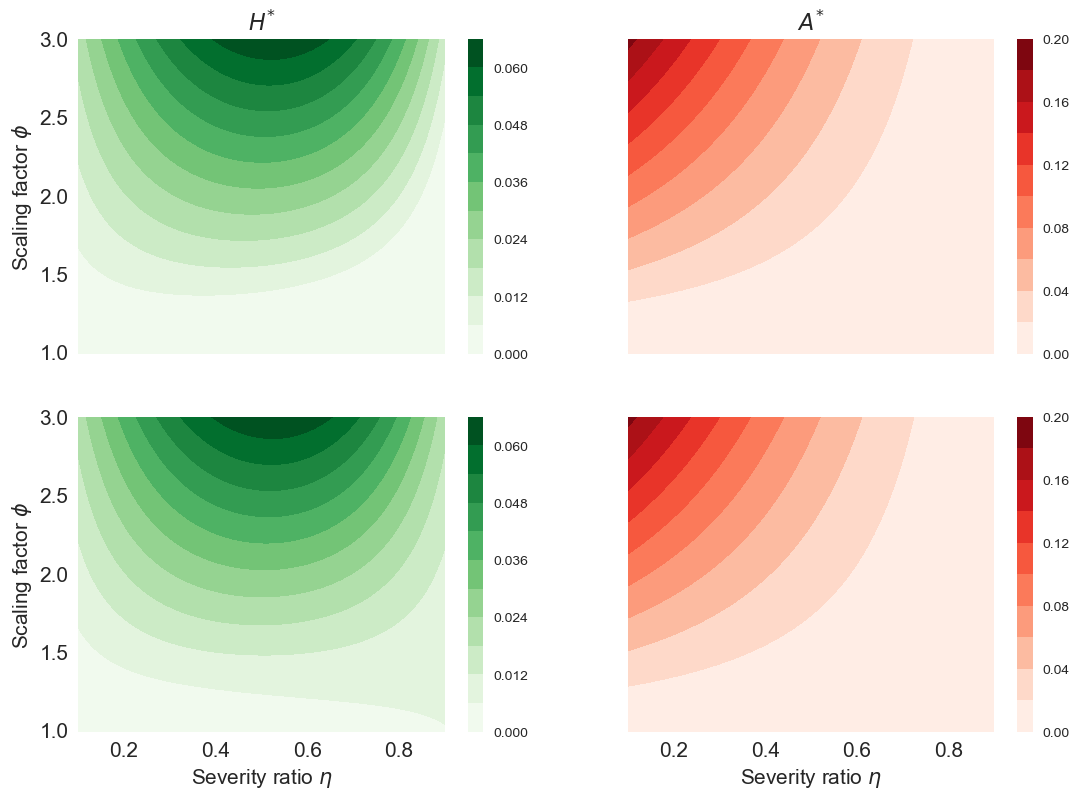

In [18]:
# equilibria for H
a = (-beta/N)*(1 + gamma/alpha)*(1 + phi*(1-ETA)/ETA)

#b = ETA*beta + beta*PHI*(1-ETA) - beta*rho*(1 + (gamma/alpha)) - gamma
def bF(rho):
    return ETA*beta + beta*PHI*(1-ETA) - beta*rho*(1 + (gamma/alpha)) - gamma

#c = ETA*beta*rho*N
def cF(rho):
    return ETA*beta*rho*N



#Hstar = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
def HstarF(rho):
    b = bF(rho)
    c = cF(rho)
    return (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
    

# equilibria for A
#Astar = (1-ETA)*Hstar/ETA
def AstarF(rho):
    return (1-ETA)*HstarF(rho)/ETA

Hstar5 = HstarF(1e-6)/N
Astar5 = AstarF(1e-6)/N

Hstar3 = HstarF(1e-3)/N
Astar3 = AstarF(1e-3)/N


# ------------------------------------------------------
fig2, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(13,9), ncols=2, nrows=2, sharex=True, sharey=True) 

# ------------------------------------------------------
# rho = 1e-6
# contour plot for H

ax1.contour(ETA, PHI, Hstar5, levels=10, linewidths=0.0001, colors='green', alpha=0.1)
cntr1 = ax1.contourf(ETA, PHI, Hstar5, levels=10, cmap="Greens")
fig2.colorbar(cntr1, ax=ax1)

ax1.set_title(r'$H^{*}$', fontsize=16)
#ax1.set_xlabel(r'$\eta$', fontsize=15)
ax1.set_ylabel(r'Scaling factor $\phi$', fontsize=15)
ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)


# contour plot for A
ax2.contour(ETA, PHI, Astar5, levels=10, linewidths=0.0001, colors='red', alpha=0.1)
cntr2 = ax2.contourf(ETA, PHI, Astar5, levels=10, cmap="Reds")
fig2.colorbar(cntr2, ax=ax2)

#ax.clabel(CS, inline=True, fontsize=15)
ax2.set_title(r'$A^{*}$', fontsize=16)
#ax2.set_xlabel(r'$\eta$', fontsize=15)
#ax2.set_ylabel(r'$\phi$', fontsize=15)
ax2.tick_params(axis='x', labelsize=15)
ax2.tick_params(axis='y', labelsize=15)
# ------------------------------------------------------


# ------------------------------------------------------
# rho = 1e-3
# contour plot for H

ax3.contour(ETA, PHI, Hstar3, levels=10, linewidths=0.0001, colors='green', alpha=0.1)
cntr5 = ax3.contourf(ETA, PHI, Hstar3, levels=10, cmap="Greens")
fig2.colorbar(cntr5, ax=ax3)

ax3.set_xlabel(r'Severity ratio $\eta$', fontsize=15)
ax3.set_ylabel(r'Scaling factor $\phi$', fontsize=15)
ax3.tick_params(axis='x', labelsize=15)
ax3.tick_params(axis='y', labelsize=15)


# contour plot for A
ax4.contour(ETA, PHI, Astar3, levels=10, linewidths=0.0001, colors='red', alpha=0.1)
cntr6 = ax4.contourf(ETA, PHI, Astar3, levels=10, cmap="Reds")
fig2.colorbar(cntr6, ax=ax4)

ax4.set_xlabel(r'Severity ratio $\eta$', fontsize=15)
#ax4.set_ylabel(r'$\phi$', fontsize=15)
ax4.tick_params(axis='x', labelsize=15)
ax4.tick_params(axis='y', labelsize=15)
# ------------------------------------------------------

plt.savefig("contour_equilibria.pdf", bbox_inches = 'tight')
plt.show()